# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [7]:
#difference in stockprice
#df['Diff'] = df.diff().shift(-1)
df.head()

,Adj Close,Diff
Date,,
1980-12-31,0.117887,-0.020296
1981-01-31,0.097591,-0.006045
1981-02-28,0.091546,-0.006909
1981-03-31,0.084637,0.013386
1981-04-30,0.098023,0.016409


In [10]:
df["Target"] = np.sign(df['Diff'])

In [11]:
df.head()

,Adj Close,Diff,Targer,Target
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,-1.0
1981-01-31,0.097591,-0.006045,-1.0,-1.0
1981-02-28,0.091546,-0.006909,-1.0,-1.0
1981-03-31,0.084637,0.013386,1.0,1.0
1981-04-30,0.098023,0.016409,1.0,1.0


In [38]:
df['Premium'] = .08 * df['Adj Close']

In [39]:
df.head()

,Adj Close,Diff,Targer,Target,Premium,Predictions,Profits
Date,,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,1.0,0.006771,1.0,0.067710
1981-04-30,0.098023,0.016409,1.0,1.0,0.007842,1.0,0.078419


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [41]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [42]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [43]:
logreg = LogisticRegression()
logreg.fit(X, y)  
y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [44]:
df['Predictions'] = y_pred

In [45]:
df

,Adj Close,Diff,Targer,Target,Premium,Predictions,Profits
Date,,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,1.0,0.006771,1.0,0.067710
1981-04-30,0.098023,0.016409,1.0,1.0,0.007842,1.0,0.078419
...,...,...,...,...,...,...,...
2023-05-31,176.778076,16.675476,1.0,1.0,14.142246,1.0,141.422461
2023-06-30,193.453552,2.473404,1.0,1.0,15.476284,1.0,154.762842
2023-07-31,195.926956,-8.304138,-1.0,-1.0,15.674156,-1.0,0.000000


In [46]:
df["Profits"] = 0
#True Positives
df.loc[(df['Predictions'] == 1) & (df['Target'] == 1), "Profits"] = df["Premium"]
#False Positives
df.loc[(df['Predictions'] == 1) & (df['Target'] == -1), "Profits"] = 100*df["Diff"] + df["Premium"]


# 5.) Plot profits over time

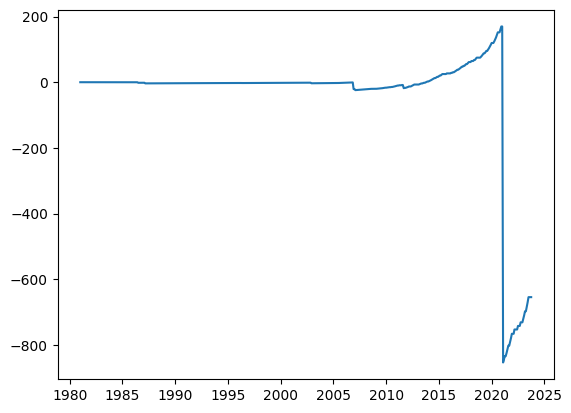

In [47]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

In [ ]:
#5.5. ) Your skills from MQE to help Mr. Liu's ventures. 
# Skills from the MQE that would help in his ventures in crypto are developing models to help forecast crypto currency prices. 
# As such a new space, innovations are necessary to forecast the value of virtual tokens in a way that is not needed with traditional
#stock trading. Deeper knowledge of blockchain that we may learn in Spring quarter will likely help improve skills to improve 
#forecasting abilities in this space

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.